In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
df=pd.read_csv("Language Detection.csv")

In [4]:
df.sample(9)

,Text,Language
10194,ಅದರ ಬಗ್ಗೆ ನಿಮ್ಮ ಅಭಿಪ್ರಾಯವೇನು?,Kannada
7510,giù nella casella della descrizione per questo...,Italian
8069,Birinin sadece ağlamak ve olmayan bir şeyden ş...,Turkish
771,In cases where vast numbers of potential answe...,English
125,Given the status of the ongoing Holocene extin...,English
5250,"no te olvides de decir, ¿quién es ese tipo afa...",Spanish
2363,நீங்கள் அதை மீண்டும் செய்ய நினைப்பீர்களா?,Tamil
441,"[141] On March 1, 2014, The Economist, in an a...",English
8262,Buraya evlilikte nergis istemek için ne merhab...,Turkish


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [6]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

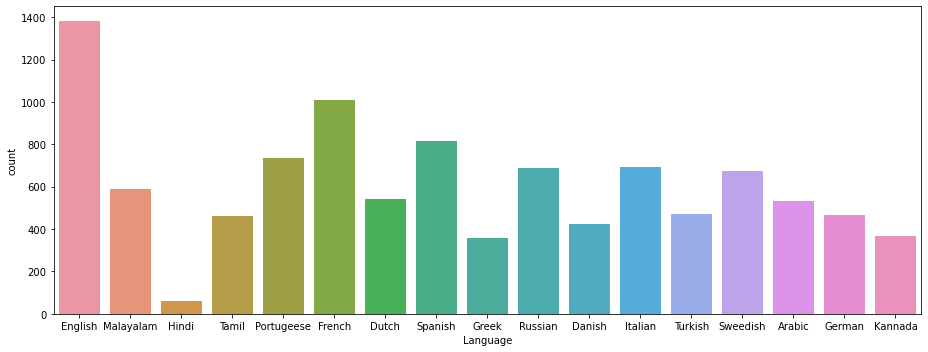

In [38]:
plt.figure(figsize=(13,5))
sns.countplot(data=df,x="Language")
plt.tight_layout()

In [8]:
df.duplicated().sum()

66

In [9]:
df.drop_duplicates(inplace=True)


## text preprocessing

In [10]:
def text_preprocessing(text):
    #(\w) matches any word character (letters, digits, and underscores)
    #(\s) matches any whitespace character (spaces, tabs, newlines, etc.).
    text=re.sub('[^\w\s]','',text)
    #"HELLO, WORLD!"="hello, world!"
    text=text.lower()
    # (\d+) matches one or more digits (0-9) in a string
    text=re.sub('\d+', '', text)
    return text


In [11]:
df["Text"]=df["Text"].apply(text_preprocessing)

In [12]:
df["Text"]

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10332             ನಮಮ ತಪಪ ಏನ ಬದದಯದರ ಆ ದನದದ ನಮಗ ಒಳಳಯದನನ ನಡಣ
10333    ನರಸಸ ತನ ಮದಲಗ ಹಣಗಡತತದದ ಮರಗಗಳನನ ಬದಲಯಸದಳ ಆದರ ನಧನವ...
10334    ಹಗ  ನರಸಸಸಮ ಈಗ ಮರಯನ ಅವರಗ ಸಭವಸದ ಎಲಲವನನ ಹಳದ ಮತತ ಅ...
10335          ಅವಳ ಈಗ ಹಚಚ ಚನನದ ಬರಡ ಬಯಸವದಲಲ ಎದ ನನ ess ಹಸದದನ
10336    ಟರರ ನವ ನಜವಗಯ ಆ ದವದತನತ ಸವಲಪ ಕಣತತದದರ ಆದರ ನನ ಏನ ನ...
Name: Text, Length: 10271, dtype: object

## Overview of differnent machine learning algorithms

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(df["Text"])
x.shape

(10271, 46073)

##### dimensionality reduction 

In [70]:
from sklearn.decomposition import TruncatedSVD
# Create a TruncatedSVD object with desired number of components
svd = TruncatedSVD(n_components=100)
# Fit the TruncatedSVD model to the sparse matrix
data=svd.fit_transform(x)


In [71]:
df2=pd.DataFrame(data)


In [72]:
df2["Language"]=df["Language"]

In [73]:
df2

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Language
0,6.926830e-03,1.518670e-01,1.809526,-0.367102,2.100870e-03,-0.067271,0.069418,-2.412495e-02,0.062506,0.042231,...,0.303725,-0.010482,0.046642,-0.051401,0.114409,0.127041,0.081969,-0.036575,0.033570,English
1,1.919353e-02,1.934505e-01,2.855856,-0.593246,-3.062974e-02,-0.164425,-0.046033,-1.578130e-01,0.194406,-0.101383,...,0.064989,-0.114924,0.100086,0.019423,0.024641,0.033584,-0.042625,-0.000304,0.042197,English
2,2.445435e-02,1.631879e-01,2.376907,-0.473573,-2.770905e-02,-0.177665,-0.286075,-1.708102e-02,0.384242,-0.209820,...,-0.123847,-0.208786,0.035146,-0.068557,-0.005563,0.113894,0.039281,0.083665,-0.081807,English
3,7.969169e-03,9.300494e-02,0.825163,-0.182635,-2.616805e-02,-0.053760,-0.085815,5.804253e-02,0.127938,0.022579,...,0.084788,-0.043918,-0.052970,-0.125116,-0.102195,0.319521,0.093117,0.387475,-0.224572,English
4,1.089810e-02,2.552401e-01,3.269151,-0.674195,-2.951175e-03,-0.177761,-0.064994,-8.517818e-02,0.330953,-0.115754,...,0.613599,-0.016671,0.085978,-0.102891,0.217293,0.227261,0.168081,-0.162175,0.035525,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,2.177336e-09,6.306779e-07,0.000009,-0.000002,-3.844899e-07,-0.000003,-0.000004,3.166837e-07,0.000013,-0.000009,...,0.024379,-0.007224,-0.008458,0.013658,0.018998,0.054234,-0.021551,-0.032719,-0.016862,Kannada
10267,2.838760e-07,5.567321e-06,0.000155,-0.000037,-8.872784e-06,-0.000026,-0.000062,3.234353e-05,0.000081,-0.000028,...,0.329216,-0.151706,-0.020489,0.087670,0.153261,0.571136,-0.286109,-0.384117,-0.075820,Kannada
10268,3.995973e-09,8.196743e-07,0.000018,-0.000004,-7.667304e-07,-0.000005,-0.000010,2.967115e-06,0.000020,-0.000012,...,0.110016,-0.045194,-0.012361,0.036569,0.056558,0.197488,-0.095044,-0.130979,-0.034595,Kannada
10269,4.158912e-07,6.081088e-06,0.000185,-0.000044,-1.149420e-05,-0.000027,-0.000066,4.257982e-05,0.000070,-0.000005,...,0.081256,0.006282,-0.063232,0.079964,0.087335,0.211325,-0.063560,-0.128475,-0.104785,Kannada


In [74]:
from pycaret.classification import *

In [75]:
# init setup
from pycaret.classification import *
exp_name = setup(df2, target ="Language")

,Description,Value
0,session_id,4165
1,Target,Language
2,Target Type,Multiclass
3,Label Encoded,"Arabic: 0, Danish: 1, Dutch: 2, English: 3, French: 4, German: 5, Greek: 6, Hindi: 7, Italian: 8, Kannada: 9, Malayalam: 10, Portugeese: 11, Russian: 12, Spanish: 13, Sweedish: 14, Tamil: 15, Turkish: 16"
4,Original Data,"(10271, 101)"
5,Missing Values,True
6,Numeric Features,100
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [74]:
# modeling
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9068,0.9921,0.8943,0.9093,0.9067,0.8995,0.8997,8.9650
rf,Random Forest Classifier,0.9051,0.9924,0.8922,0.9088,0.9051,0.8977,0.8979,1.5010
xgboost,Extreme Gradient Boosting,0.9046,0.9936,0.8909,0.9067,0.9045,0.8971,0.8972,37.4250
et,Extra Trees Classifier,0.9004,0.9874,0.8800,0.9041,0.9002,0.8925,0.8928,0.6380
gbc,Gradient Boosting Classifier,0.8939,0.9912,0.8771,0.8982,0.8943,0.8856,0.8859,94.3700
qda,Quadratic Discriminant Analysis,0.8889,0.9659,0.8712,0.8982,0.8898,0.8802,0.8807,0.0750
svm,SVM - Linear Kernel,0.8701,0.0000,0.8525,0.8985,0.8770,0.8600,0.8618,0.1330
knn,K Neighbors Classifier,0.8676,0.9699,0.8558,0.8699,0.8670,0.8573,0.8575,0.2620
ridge,Ridge Classifier,0.8385,0.0000,0.8011,0.8697,0.8418,0.8245,0.8287,0.0290
lr,Logistic Regression,0.8354,0.9894,0.8073,0.8802,0.8464,0.8227,0.8263,1.5810


In [36]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9961,0.9137,0.9234,0.9226,0.9171,0.9171
1,0.9077,0.9946,0.8964,0.9109,0.9078,0.9006,0.9007
2,0.8923,0.9952,0.8814,0.8957,0.8932,0.8839,0.8840
3,0.9119,0.9967,0.8848,0.9134,0.9117,0.9050,0.9051
4,0.9161,0.9940,0.9100,0.9179,0.9164,0.9095,0.9096
5,0.9133,0.9936,0.9059,0.9156,0.9134,0.9065,0.9067
6,0.9230,0.9946,0.8992,0.9247,0.9226,0.9169,0.9170
7,0.9272,0.9946,0.9242,0.9278,0.9271,0.9215,0.9215
8,0.9258,0.9950,0.9144,0.9265,0.9256,0.9200,0.9200


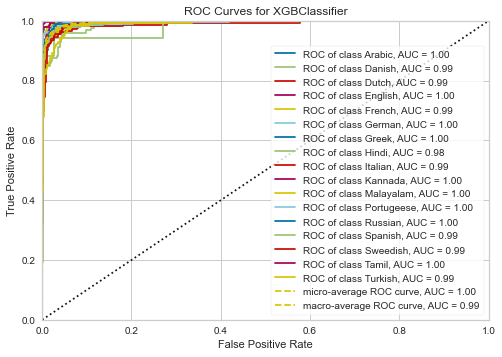

In [38]:
plot_model(xgboost,'auc')

In [39]:
predict_model(xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9137,0.9958,0.8990,0.9157,0.9139,0.9070,0.9071


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,Language,Label,Score
0,7.418546e-02,-2.869124e-02,-1.203333e-02,-1.269958e-02,5.160957e-02,-0.107515,-2.855333e-02,-2.277536e-02,-1.946460e-02,0.000132,...,0.004298,-0.027021,-0.009135,-0.016027,0.019427,0.060156,0.058921,French,French,0.9999
1,9.893664e-06,7.715803e-06,1.122967e-05,-4.266148e-07,1.121988e-06,0.000005,-7.710748e-06,-1.956287e-06,-8.267050e-06,0.000037,...,-0.010102,-0.011748,0.000342,0.000664,0.004197,-0.001154,0.002616,Tamil,Tamil,0.9998
2,9.774324e-07,1.693809e-06,5.884910e-07,2.352112e-07,-3.494811e-06,0.000005,4.713139e-06,-8.566875e-06,2.308443e-05,0.000019,...,0.018156,-0.024853,-0.022000,0.030872,0.032204,-0.035123,-0.025173,Tamil,Tamil,0.9997
3,1.239796e-01,1.401094e-02,1.573230e-02,1.297263e-01,-1.422228e-02,0.037629,6.822515e-02,7.949852e-02,5.983542e-03,0.000157,...,0.017047,0.000630,-0.018081,-0.006017,0.011000,0.008378,0.005280,Dutch,Dutch,0.9994
4,1.005448e-01,3.127365e-01,-2.122781e-02,-1.197371e-02,-7.486951e-03,-0.013774,1.260645e-02,-9.569444e-03,-5.747858e-03,-0.001887,...,-0.000284,0.031810,-0.052273,0.034302,0.010601,0.027331,0.054034,English,English,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,8.359618e-06,7.133946e-06,5.661570e-06,-1.656847e-06,5.107988e-06,0.000017,2.692456e-05,4.030347e-06,-1.581249e-06,0.000022,...,-0.010516,-0.007882,0.003978,0.001504,-0.004198,-0.001721,0.004878,Tamil,Tamil,0.9994
3055,2.442411e-07,4.801335e-07,-2.254824e-08,-4.948149e-07,5.401899e-07,-0.000001,4.931873e-07,-1.831008e-07,-4.532581e-07,0.000002,...,-0.001871,0.001162,0.000762,0.000344,-0.001977,-0.003913,-0.001826,Russian,Russian,0.9998
3056,3.480360e-02,9.172792e-02,-3.955548e-03,3.558827e-03,-1.596423e-02,0.003072,-5.434759e-02,-2.376880e-02,-3.318497e-03,0.003197,...,-0.003312,-0.001351,0.008770,-0.004124,0.000499,-0.010067,-0.026941,English,English,0.9990
3057,8.608679e-02,-2.244364e-02,5.382174e-02,6.135258e-03,1.122058e-01,-0.076698,-6.644585e-02,-3.484770e-02,-2.066874e-02,0.000556,...,0.003641,0.019093,0.006612,-0.012714,0.005154,-0.014766,0.006429,French,French,0.9964


In [40]:
predictions = predict_model(xgboost, data=df2)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,Language,Label,Score
0,0.097076,0.257189,-0.017186,0.001876,0.014538,-0.016007,0.008157,-0.003154,-0.007571,-0.001145,...,0.026053,-0.002793,0.023601,0.004716,0.013682,0.004131,0.028152,English,English,0.9994
1,0.140656,0.411110,-0.029634,-0.035608,0.008424,-0.031771,-0.006558,-0.008702,-0.012947,-0.000817,...,0.043939,0.011833,0.008397,-0.053290,-0.007159,0.017250,0.044350,English,English,0.9928
2,0.139814,0.398396,-0.028997,-0.011034,-0.011669,-0.062169,0.018518,-0.020827,0.001970,-0.001921,...,-0.053493,0.010378,0.024646,-0.023258,-0.008701,-0.027369,0.012802,English,English,0.9980
3,0.059170,0.145541,-0.012308,0.004322,-0.005851,-0.026406,0.001997,-0.010407,0.000885,-0.000710,...,0.005924,0.038680,0.045353,0.021632,-0.017056,0.022277,0.043486,English,English,0.9997
4,0.099429,0.269703,-0.019352,-0.002313,0.008353,-0.029442,0.003040,-0.008227,-0.005898,-0.000839,...,0.019103,-0.007545,-0.016709,0.018085,0.019023,0.024747,0.045122,English,English,0.9995


## Pipeline for Task

In [13]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df["Text"], df['Language'], test_size=0.2, random_state=42)

In [14]:
x_test

8096     bu hiç akıllıca değil eğer yanlış bir şey yapt...
7856     basit bir örnek vermek gerekirse beatles dünya...
3676     mediawiki est sous licence gnu gpl et est en  ...
318       it started almost entirely openanyone could c...
3027     se alguém conseguiu o emprego dos seus sonhos ...
                               ...                        
10297    ನನ ಎಚಚರವಯತ ಅವಳ ಎಲಲ ಸಮಲಸ ಮತತ ಮಸಕನ ಗದದಟ ಇಲಲ ಪರಯತ...
5260     estar aturdido tan estupendo se usa para descr...
400       in  a slate magazine article reported that ac...
2972                                        como você sabe
3498     kiwix est lun des principaux logiciels libres ...
Name: Text, Length: 2055, dtype: object

In [ ]:
#Bag of Words [ converting text into numerical form by creating a Bag of Words model using CountVectorizer.]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()# tokenize a collection of text documents

In [40]:
cv.fit_transform(x_test).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
cv.fit_transform(x_train).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
model= MultinomialNB()

In [ ]:
model.fit(x_train,y_train)

In [15]:
#Bag of Words [ converting text into numerical form by creating a Bag of Words model using CountVectorizer.]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()# tokenize a collection of text documents

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model = MultinomialNB()

In [22]:
model_pipe=pipeline = Pipeline([
    ("BagOfwords", cv),
    ("naive_bayes", model)
])

In [23]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('BagOfwords', CountVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [24]:
y_pre=model_pipe.predict(x_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pre) )

              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       121
      Danish       0.99      0.96      0.98        85
       Dutch       1.00      0.97      0.99       108
     English       0.88      1.00      0.94       290
      French       0.99      0.99      0.99       210
      German       1.00      1.00      1.00        86
       Greek       1.00      0.98      0.99        65
       Hindi       1.00      1.00      1.00         8
     Italian       1.00      0.97      0.98       130
     Kannada       1.00      0.97      0.99        70
   Malayalam       1.00      0.98      0.99       122
  Portugeese       0.98      0.97      0.97       139
     Russian       1.00      0.98      0.99       119
     Spanish       0.99      0.96      0.98       160
    Sweedish       0.99      0.98      0.98       150
       Tamil       1.00      0.98      0.99        86
     Turkish       1.00      0.92      0.96       106

    accuracy              

In [26]:
model_pipe.predict(["Gli alberi di decisione possono essere"])

array(['Italian'], dtype='<U10')

In [28]:
#import joblib

# Load the model from a file
#model = joblib.load("LanguageIdentifier.pkl")